## HH Summary Statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from pylfi.features import SpikingFeatures
from pylfi.inferences import RejectionABC
from pylfi.models import HodgkinHuxley
from pylfi.priors import Normal

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=True)

In [2]:
T = 120.
dt = 0.025
t_stim_on = 10
t_stim_off = 110
duration = t_stim_off - t_stim_on
hh = HodgkinHuxley()

def stimulus(t):
    return 10 if t_stim_on <= t <= t_stim_off else 0

def simulator(gbar_K, feature='spike_rate'):
    hh.gbar_K = gbar_K
    hh.solve(stimulus, T, dt)
    t = hh.t
    V = hh.V
    features = SpikingFeatures(V, t, duration, t_stim_on, threshold=0)
    sum_stat = getattr(features, feature)
    return t, V, sum_stat

### Pearson’s Correlation

The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples. 

The Pearson correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

### Spearman’s Correlation

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

In [3]:
def correlation(feature='spike_rate'):
    thetas = np.linspace(30, 45, 50)

    simulations = []
    sum_stats = []

    for theta in thetas:
        t, V, sum_stat = simulator(theta, feature)
        simulations.append((t, V))
        sum_stats.append(sum_stat)
    
    sum_stats = np.array(sum_stats)
    cor_p, _ = stats.pearsonr(thetas, sum_stats) # pearson correlation
    cor_s, _ = stats.spearmanr(thetas, sum_stats) # spearman correlation
    
    plt.scatter(thetas, sum_stats)
    plt.xlabel(r'$\bar{g}_K$')
    plt.ylabel(feature.replace("_", " "))
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = '\n'.join((
        r'pearson = %.3f' % (cor_p),
        r'spearman = %.3f' % (cor_s),
    ))
    # place a text box in upper left in axes coords
    plt.text(1.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

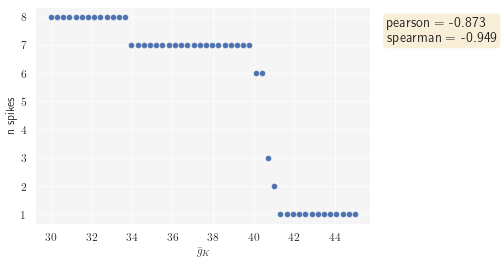

In [4]:
correlation('n_spikes')

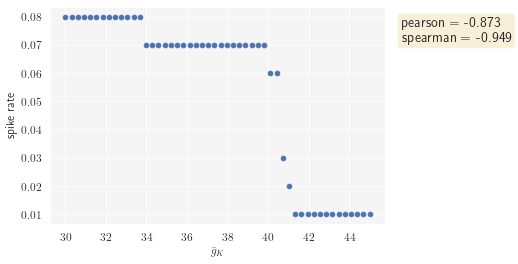

In [5]:
correlation('spike_rate')

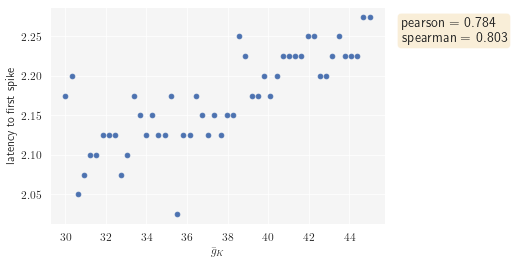

In [6]:
correlation('latency_to_first_spike')

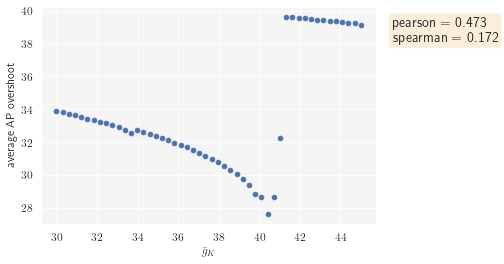

In [7]:
correlation('average_AP_overshoot')

In [8]:
correlation('average_AHP_depth')

ValueError: array must not contain infs or NaNs

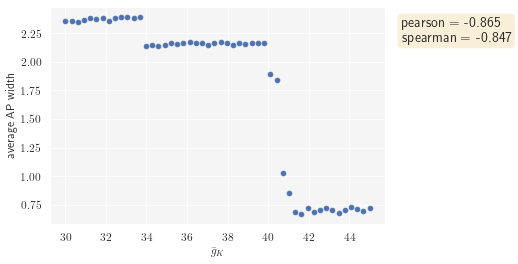

In [9]:
correlation('average_AP_width')

In [10]:
correlation('accommodation_index')

ValueError: array must not contain infs or NaNs